In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [29]:
import os
import cv2
path='D:/dataset for lab programs/archive/animals/animals'
classes= sorted(os.listdir(path))

# Count the number of classes
num_classes = len(classes)

# Print the class names and the total number of classes
print("Class Names: \n", classes)
print("Number of Classes:", num_classes)


Class Names: 
 ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
Number of Classes: 90


In [30]:
path='D:/dataset for lab programs/archive/animals/animals'
cat_pth=os.path.join(path,'cat')
dog_pth=os.path.join(path, 'dog')
lion_pth=os.path.join(path,'lion')
wolf_pth=os.path.join(path,'wolf')
leopard_pth=os.path.join(path,'leopard')

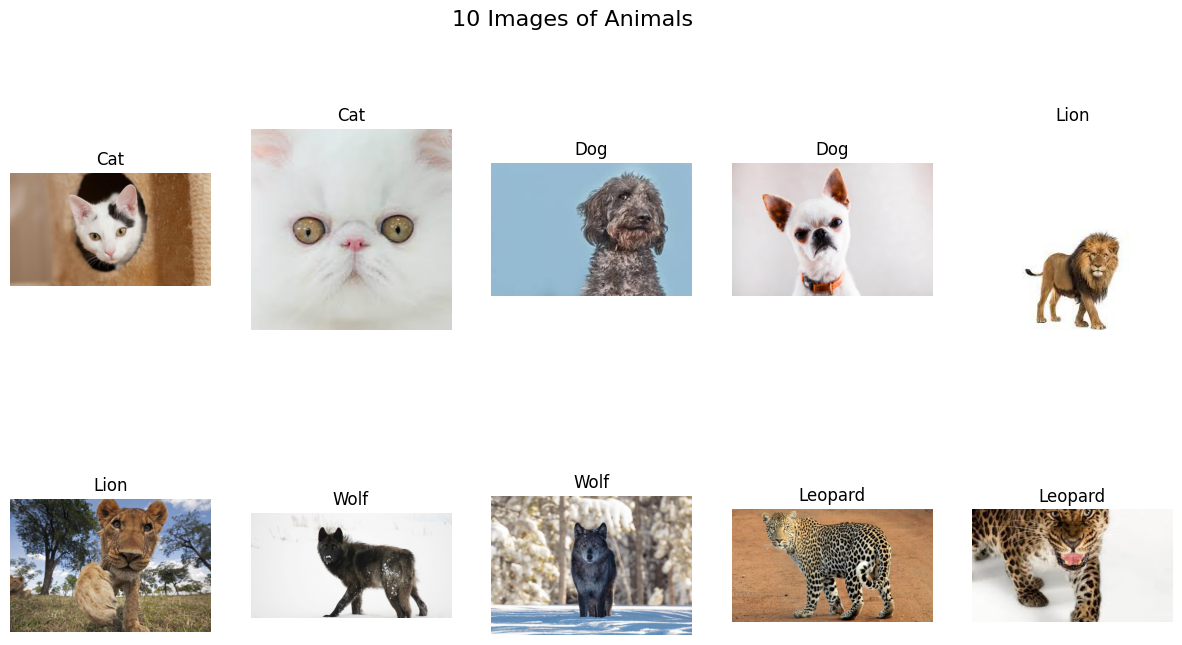

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the image directories
path = 'D:/dataset for lab programs/archive/animals/animals'
cat_path = os.path.join(path, 'cat')
dog_path = os.path.join(path, 'dog')
lion_path = os.path.join(path, 'lion')
wolf_path = os.path.join(path, 'wolf')
leopard_path = os.path.join(path, 'leopard')

# Plotting the images in a 2x5 grid
plt.figure(figsize=(15, 8))
plt.suptitle('10 Images of Animals', fontsize=16)

# Plot 2 images for each animal category
for i, (image_path, animal_name) in enumerate([(cat_path, 'Cat'), (dog_path, 'Dog'), (lion_path, 'Lion'), (wolf_path, 'Wolf'), (leopard_path, 'Leopard')]):
    for j in range(2):
        plt.subplot(2, 5, i * 2 + j + 1)
        image_file = os.listdir(image_path)[j]
        img = mpimg.imread(os.path.join(image_path, image_file))
        plt.imshow(img)
        plt.title(animal_name)
        plt.axis('off')

plt.show()

In [33]:
image_size = (150, 150)  # Define the desired image size


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path='D:/dataset for lab programs/archive/animals/animals'
cat_pth=os.path.join(path,'cat')
dog_pth=os.path.join(path, 'dog')
lion_pth=os.path.join(path,'lion')
wolf_pth=os.path.join(path,'wolf')
leopard_pth=os.path.join(path,'leopard')
# Define parameters for data augmentation and normalization
batch_size = 32
image_size = (150, 150)
validation_split = 0.2

# Create ImageDataGenerator instances for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,             # rescale pixel values to [0,1]
    shear_range=0.2,            # shear transformations
    zoom_range=0.2,             # zoom transformations
    horizontal_flip=True,       # horizontal flips
    validation_split=validation_split
)



validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Generate train and validation datasets
train_generator = train_datagen.flow_from_directory(path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = validation_datagen.flow_from_directory(path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the class indices
print("Class indices:")
print(train_generator.class_indices)
     

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Class indices:
{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 

In [41]:
# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,893 (18.42 MB)

 Trainable params: 4,829,445 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)